# Hackathon 1, statistics.

This project illustrates the statistics part of the course LEPL1109. In the first part of the project, you will study the China water pollution by analyzing a dataset providing the water pollution levels collected from various monitoring stations across 10 major provinces in China throughout the year 2023. In the second part of the project, you will analyze a dataset containing high-frequency time-series  data collected from an industrial boiler operating in a chemical plant.

## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

•	Do not comment your results directly into cells of code. Use instead a Markdown cell. 

•	"Dry" code or results not followed by a minimum of analysis / comments will be penalized.


## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: Lepoutre Florian - 45122300

Part. 2: Peffer Jean-Louis - 72232300

Part. 3: Schlicker Ulrick - 41982300

Part. 4: Jamblin Otto - 36402301

Part. 5: Thiry John - 45942300

Part. 6: Gangolf Pierre - 40492300

# China Water Pollution 

This dataset provides  water pollution levels collected from various monitoring stations across 10 major provinces in China throughout the year 2023. The data  includes  parameters such as pH, turbidity, chemical and biological oxygen demand, nutrient levels, and heavy metal concentrations. These indicators are widely used by environmental monitoring agencies to assess water quality for ecological, human, and industrial impacts.

We will focus on the Water Quality Index. 

## 1. Basic statistics

1.a) Load the dataset 'china_water_pollution_data_hack.csv'. Convert Province, City  to categorical variables. (**0.5 pt**) 

In [13]:
#code here
import pandas as pd
import numpy as np
data = pd.read_csv('./China_water_pollution/china_water_pollution_data_hack.csv')


# Convertir en variables catégorielles
data['Province'] = data['Province'].astype('category')
data['City'] = data['City'].astype('category')


In [40]:
# we have a dataframe, we convert it in an array and just
datn = data.values
n  = datn.shape[0] #nombre de villes
print(n)


water_quality_index = data['Water_Quality_Index'].values  # pour éviter les NaN

# Calculs statistiques manuels
print("Moyenne :", np.mean(water_quality_index))
print("Variance :", np.var(water_quality_index))
print("Médiane :", np.median(water_quality_index))
print("1er quartile (25%) :", np.quantile(water_quality_index, 0.25))
print("3e quartile (75%) :", np.quantile(water_quality_index, 0.75))


3000
Moyenne : 57.56112230000001
Variance : 30.532331360309655
Médiane : 57.52858333333334
1er quartile (25%) : 53.74819791666667
3e quartile (75%) : 61.66666666666666


1.b) Calculate the mean, variance, median, 25% and 75% quantiles of the water quality index (which ranges from 0 to 100) for all cities in the dataset. Comment your results! (**1.5 pts**)

In [41]:
#code here




Comment here:

## 2. Hypothesis tests 

2.a) Check with a Student's T test that the average water quality index is the same in Shenzhen and Dali: $$H_0: \mu_{Shenzhen} = \mu_{Dali},$$ 
$$H_1: \mu_{Shenzhen} \neq \mu_{Dali}.$$ Calculate all statistics and p-value without recourse to other functions than statistical distributions (use course's formula). Use a confidence level of 5%. Take care to comment your conclusions. Are all assumptions required to perform this test sastisfied? Which additional test do you have to do to validate your result? (**2.5 pts**)

In [42]:
#code here


Comment here:

2.b) 'Wuhan', 'Luoyang', 'Chengdu', 'Nanjing', 'Dali' seems to have similar (and low) water quality index. Test the assumption: $$H_0:  \mu_{Wuhan} = \mu_{Luoyang}= \mu_{Chengdu} = \mu_{Nanjing} =\mu_{Dali}.$$
**Hint**: reformulate the problem as a linear regression.

(**2 pts**)

In [43]:
#code here


Comment here: 

## 3. Regressions

3.a) Propose a regression model which explains the Water_Quality_Index as a function of other explanatory variables, **for the city of Shanghai**. Split your data set into a training set (80% of the data) that you use for fitting the model and a test set (20% of the data) on which you test the accuracy of the model. 

* Use the OLS() function of the package statsmodels.api to perform the linear regression. 
* Comment your results (goodness of fit, R2, F-stat and T-stats of coefficients)
* Identify potential non-relevant covariates
* Calculate the MAE on the test and training sets. 

(**3 pts**)

In [44]:
#code here 


Comment here: 

3.b) Same question as 3.a) but now you use a Gaussian process regression. Use a RBF and Matern kernel and compare MAEs of the 2 models. Which one is the best? (**2 pts**)

In [45]:
#code here


Comment here: 

# Boiler

![furnace_plotL](boiler/furnace_plotL.PNG)

This dataset contains high-frequency time-series  data collected (every 5 seconds) from an industrial boiler operating in a chemical plant. The boiler is equipped with multiple sensors capturing parameters such as pressure, temperature, flow rate, and oxygen levels. The dataset reflects a real-world industrial scenario. The boiler outlet steam temperature, ranging typically from 530 °C to 545 °C during stable operation, is used as the key indicator of equipment state. Deviations outside this range represent abnormal operating conditions. 

## 4. Poisson Process

4. During stable operations, the outlet steam temperature is in the interval 530 °C to 545 °C. 

a) Load the dataset 'data_boiler.csv', plot the Boiler outlet steam temperature (variable 'TE_8332A.AV_0') and count the number of times this temperature is outside this normal range. What do you observe? (**1 pt**)

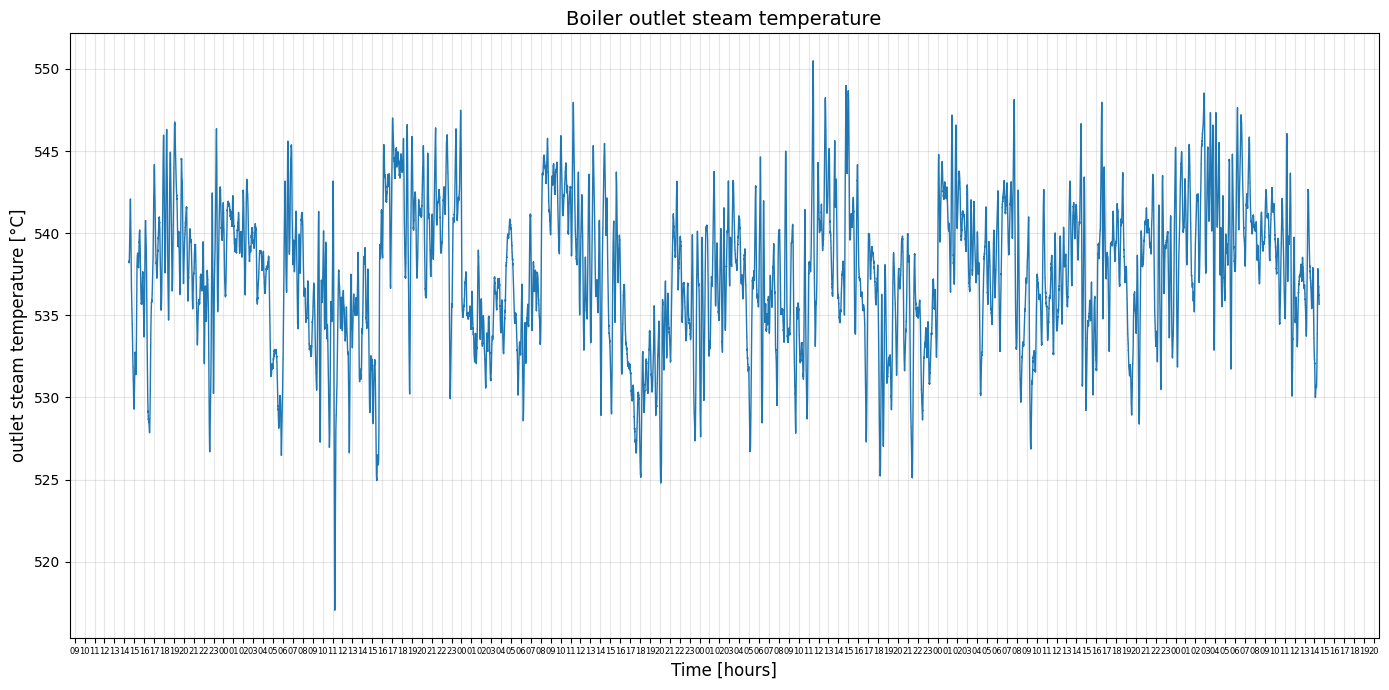

the number of times the boiler is outside its normal temperature range is: 7037
the probability of the boiler to be outside its normal tempurature range is: 0.08144675925925926
the number of times the boiler is inside its normal temperature range is: 79327
the probability of the boiler to be inside its normal tempurature range is: 0.9181365740740741


In [2]:
#code here
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 

df = pd.read_csv('Boiler\data_boiler.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)

#plot
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(df.index,df['TE_8332A.AV_0#'],linewidth=1)

# Format x-axis
ax.set_title('Boiler outlet steam temperature', fontsize=14)
ax.set_xlabel('Time [hours]', fontsize=12)
ax.set_ylabel('outlet steam temperature [°C]', fontsize=12)
ax.grid(True, alpha=0.3)

# Set date format and intervals
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # toute les 1H
plt.xticks( fontsize=6)
plt.tight_layout()

plt.show()

#counting number of times outside normale range 
tf = pd.read_csv('Boiler\data_boiler.csv')
temp_val = tf['TE_8332A.AV_0#'].tolist()

ntimes_out = 0
for i in range(0,len(temp_val)):
    if ((temp_val[i] > 545) or (temp_val[i] < 530)):
        ntimes_out += 1

print(f"the number of times the boiler is outside its normal temperature range is: {ntimes_out}")

prob_out = ntimes_out/len(temp_val)

print(f"the probability of the boiler to be outside its normal tempurature range is: {prob_out}")

#esperance of finding outside its normal temp range (avec x_i -> la temperature recolter du boiler) (V.A = {1 si 530 [°C] < x_i < 545 [°C]
#                                                                                                       {0 sinon 


#esperance of finding inside its normal temp
ntimes_in = 0
for i in range(0,len(temp_val)):
    if ((temp_val[i] < 545) and (temp_val[i] > 530)):
        ntimes_in += 1

print(f"the number of times the boiler is inside its normal temperature range is: {ntimes_in}")

prob_in = ntimes_in/len(temp_val)

print(f"the probability of the boiler to be inside its normal tempurature range is: {prob_in}")


Comment here: We can observe that the number of times the boiler is outside its normal temperature range is 7037, this is low compared to the number of times it is inside its normal tempuratur range, the probabilities of finding a temperature outside its normal range on the whole period of time is 0.082 and finding it inside its normal range is 0.918. We can conclude that the boiler is relatively stable in the long term.

b) A Poisson process, denoted by $N_t$ is a counting process. The number of events observed during an interval [0,t] is distributed according to a Poisson law with a parameter $\lambda \times t$. Using the method of moment, estimate $\lambda \times t$, the frequency of overheating **or** underheating (i.e. when we are outside the interval) per hour.

Remark: do not forget that time-series data are collected every 5 seconds.

(**1.5 pt**)

In [ ]:
import scipy.stats as sci
time_T = (len(temp_val)*5)/3600
lamba = ntimes_out /time_T 
print(f"parametre lambda_1 is: {lamba}")
lamba2 = ntimes_in/time_T
print(f"parametre lambda_2 is: {lamba2}")


parametre lambda is: 58.641666666666666
parametre lambda2 is: 661.0583333333333


c) Calculate the probability of observing more ( >= ) than 50 abnormal temperatures on 1h. (**1 pt**)

In [5]:
#P(X >= 50) = (1 - P(X <= 49))
# 
# P(X <= 49):
pless49 = sci.poisson.cdf(49,lamba)
pmore50 = 1 - pless49 

notpmore49 = 1 - sci.poisson.cdf(49,lamba2)

print(f"probability of observing more ( >= ) than 50 abnormal temperatures on 1h: {pmore50}")
print(f"probability of observing more ( >= ) than 50 normal temperatures on 1h: {notpmore49}")



probability of observing more ( >= ) than 50 abnormal temperatures on 1h: 0.8858156859855504
probability of observing more ( >= ) than 50 normal temperatures on 1h: 1.0


Comment here: At first we can think that the probability of observing more than 50 abnormal temperature in 1h (0.88) is very high and that it would suggest that the boiler is not stable in the short term. But comparing it to the probability of observing more than 50 normal temperatures in 1h (probability of 1) suggest otherwise that the boiler is stable in the short term, we conclude this because the boiler will not be staying a long time in a abnormal temperature range, it will quickly come back to a normal temperature range. Furthermore by compraing the paramatres $\lambda_{1} = 58.64$ (the frequency of overheating **or** underheating per hour) and $\lambda_2 = 661$ (the frequency of no overheating **and** underheating (i.e. when we are inside the interval) per hour) we can see that most of the time the boiler is inside it's normal temperature range. 

## 5. Fit of distributions and forecasting 

5. The induced draft fan motor current must in normal condition stay below 30 Amp. A current above 30 Amp may cause damage to the installation. 

a) Fit a Gamma and an exponentiated Weibull distributions to the variable YFJ3_AI.AV_0. Compare histograms and  densities, and choose the most appropriate distribution. Using the most appropriate distribution, determine the probability that over a similar period of time, we observe a peak of induced draft fan motor current above 30 Amp. 
(**3 pts**)

In [49]:
#code here


Comment here: 

b) You want to set up a prediction algorithm of over- and under-heating (variable TE_8332A.AV_0). The aim is to anticipate any abnormal deviation to take necessary measures for driving back the temperature in $[530 ; 545]$. For this purpose, you will use the measure at time $ t - lag \times 5s$ for predicting the steam temperature at time t, where $lag$ is the number of 5-seconds lags. The model to fit is of the form:
$$Y_t = \beta_0 + \beta_1 X^1_{t-lag}+\beta_2 X^2_{t-lag}+...+\beta_n X^n_{t-lag}+\varepsilon,$$ 
where $Y$ is the target variable (i.e. TE_8332A.AV_0), $(X^1,...,X^n)$ are all the explanatory variables (i.e. all the variables except TE_8332A.AV_0) and $\varepsilon \sim N(0,1).$

* Create a dataset such that for each date $t$ (each line), you have the target variable at time $t$ and the explanatory variables at time $t-lag \times 5s$.
* Use the OLS() function of the package statsmodels.api to perform the linear regression. 
* If an explanatory variable is not significant, remove it from your model.
* Test different lags and determine  the maximum number of lags, such that the probabilities that your model detects over- and under-heatings are above 90%

(**4 pts**)

In [50]:
#code here


Comment here:

c)  Compare the probabilities that your model detects over- and under-heatings. (**1 pt**)

In [51]:
#code here


Comment here: 